In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data_gen import pendulum
from scipy.stats import norm
from sklearn.metrics import mean_squared_error

In [2]:
from matplotlib import rcParams,rc
rc('text', usetex=True)
rcParams['font.family'] = 'serif'

In [3]:
def medians_from_scatter(x, y, n_bins=30, skip_end=5):
    left_lim = np.amin(x)
    right_lim = np.amax(x)
    right_lim += (right_lim - left_lim)/100000.
    bin_edges = np.linspace(left_lim, right_lim, n_bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2.
    idxs = [np.logical_and(x >= bin_edges[i], x < bin_edges[i+1]) for i in np.arange(n_bins)]
    
    median = np.array([np.percentile(y[idx], 50) for idx in idxs[:-skip_end]])
    lower = np.array([np.percentile(y[idx], 16) for idx in idxs[:-skip_end]])
    upper = np.array([np.percentile(y[idx], 84) for idx in idxs[:-skip_end]])
    
    return bin_centers[:-skip_end], median, lower, upper

In [4]:
def find_coverage(res, unc):
    sigma = np.abs(res/unc)
    cdf_sigma = 2*norm.cdf(sigma)-1
    x = np.linspace(0.01, 1, 100)
    coverage = [sum(cdf_sigma <= k)/nobject for k in x]
    return coverage

In [5]:
# make a test set
nobject=10000

feat_test_t1to10, y_test_t1to10, calc_y_test_t1to10, delta_y_test_t1to10 = pendulum(n=nobject, t_spread=[0.01, 0.1],
                                                  ell_spread=[0.02, 0.02], seed=666)
feat_test_t1to5, y_test_t1to5, calc_y_test_t1to5, delta_y_test_t1to5 = pendulum(n=nobject, t_spread=[0.01, 0.05],
                                                  ell_spread=[0.02, 0.02], seed=666)
feat_test_t1to20, y_test_t1to20, calc_y_test_t1to20, delta_y_test_t1to20 = pendulum(n=nobject, t_spread=[0.01, 0.2],
                                                  ell_spread=[0.02, 0.02], seed=666)

In [6]:
y_pred_de_t1to10 = np.load('data/y_pred_test_de_trange1to10_40ep_001.npy')
y_pred_alunc_de_t1to10 = np.load('data/y_pred_test_alunc_de_trange1to10_40ep_001.npy')
y_pred_epunc_de_t1to10 = np.load('data/y_pred_test_epunc_de_trange1to10_40ep_001.npy')
y_pred_prunc_de_t1to10 = np.load('data/y_pred_test_prunc_de_trange1to10_40ep_001.npy')

In [7]:
y_pred_de_t1to20 = np.load('data/y_pred_test_de_trange1to20_40ep_001.npy')
y_pred_alunc_de_t1to20 = np.load('data/y_pred_test_alunc_de_trange1to20_40ep_001.npy')
y_pred_epunc_de_t1to20 = np.load('data/y_pred_test_epunc_de_trange1to20_40ep_001.npy')
y_pred_prunc_de_t1to20 = np.load('data/y_pred_test_prunc_de_trange1to20_40ep_001.npy')

In [8]:
y_pred_de_t1to5 = np.load('data/y_pred_test_de_trange1to5_40ep_001.npy')
y_pred_alunc_de_t1to5 = np.load('data/y_pred_test_alunc_de_trange1to5_40ep_001.npy')
y_pred_epunc_de_t1to5 = np.load('data/y_pred_test_epunc_de_trange1to5_40ep_001.npy')
y_pred_prunc_de_t1to5 = np.load('data/y_pred_test_prunc_de_trange1to5_40ep_001.npy')

In [9]:
y_pred_bnn_t1to10 = np.load('data/y_pred_test_bnn_trange1to10_200ep_001.npy')
y_pred_alunc_bnn_t1to10 = np.load('data/y_pred_test_alunc_bnn_trange1to10_200ep_001.npy')
y_pred_epunc_bnn_t1to10 = np.load('data/y_pred_test_epunc_bnn_trange1to10_200ep_001.npy')
y_pred_prunc_bnn_t1to10 = np.load('data/y_pred_test_prunc_bnn_trange1to10_200ep_001.npy')

In [10]:
y_pred_bnn_t1to20 = np.load('data/y_pred_test_bnn_trange1to20_200ep_001.npy')
y_pred_alunc_bnn_t1to20 = np.load('data/y_pred_test_alunc_bnn_trange1to20_200ep_001.npy')
y_pred_epunc_bnn_t1to20 = np.load('data/y_pred_test_epunc_bnn_trange1to20_200ep_001.npy')
y_pred_prunc_bnn_t1to20 = np.load('data/y_pred_test_prunc_bnn_trange1to20_200ep_001.npy')

In [11]:
y_pred_bnn_t1to5 = np.load('data/y_pred_test_bnn_trange1to5_200ep_001.npy')
y_pred_alunc_bnn_t1to5 = np.load('data/y_pred_test_alunc_bnn_trange1to5_200ep_001.npy')
y_pred_epunc_bnn_t1to5 = np.load('data/y_pred_test_epunc_bnn_trange1to5_200ep_001.npy')
y_pred_prunc_bnn_t1to5 = np.load('data/y_pred_test_prunc_bnn_trange1to5_200ep_001.npy')

In [12]:
y_pred_cd_t1to10 = np.load('data/y_pred_test_cd_trange1to10_200ep_001.npy')
y_pred_alunc_cd_t1to10 = np.load('data/y_pred_test_alunc_cd_trange1to10_200ep_001.npy')
y_pred_epunc_cd_t1to10 = np.load('data/y_pred_test_epunc_cd_trange1to10_200ep_001.npy')
y_pred_prunc_cd_t1to10 = np.load('data/y_pred_test_prunc_cd_trange1to10_200ep_001.npy')

In [13]:
y_pred_cd_t1to20 = np.load('data/y_pred_test_cd_trange1to20_200ep_001.npy')
y_pred_alunc_cd_t1to20 = np.load('data/y_pred_test_alunc_cd_trange1to20_200ep_001.npy')
y_pred_epunc_cd_t1to20 = np.load('data/y_pred_test_epunc_cd_trange1to20_200ep_001.npy')
y_pred_prunc_cd_t1to20 = np.load('data/y_pred_test_prunc_cd_trange1to20_200ep_001.npy')

In [14]:
y_pred_cd_t1to5 = np.load('data/y_pred_test_cd_trange1to5_200ep_001.npy')
y_pred_alunc_cd_t1to5 = np.load('data/y_pred_test_alunc_cd_trange1to5_200ep_001.npy')
y_pred_epunc_cd_t1to5 = np.load('data/y_pred_test_epunc_cd_trange1to5_200ep_001.npy')
y_pred_prunc_cd_t1to5 = np.load('data/y_pred_test_prunc_cd_trange1to5_200ep_001.npy')

In [15]:
analytic_t1to10, median_de_t1to10, low_de_t1to10, upp_de_t1to10 = medians_from_scatter(delta_y_test_t1to10/calc_y_test_t1to10, 
                                                                                       y_pred_alunc_de_t1to10/y_pred_de_t1to10)
analytic_t1to20, median_de_t1to20, low_de_t1to20, upp_de_t1to20 = medians_from_scatter(delta_y_test_t1to20/calc_y_test_t1to20, 
                                                                                       y_pred_alunc_de_t1to20/y_pred_de_t1to20)
analytic_t1to5, median_de_t1to5, low_de_t1to5, upp_de_t1to5 = medians_from_scatter(delta_y_test_t1to5/calc_y_test_t1to5, 
                                                                                   y_pred_alunc_de_t1to5/y_pred_de_t1to5)

In [16]:
_, median_bnn_t1to10, low_bnn_t1to10, upp_bnn_t1to10 = medians_from_scatter(delta_y_test_t1to10/calc_y_test_t1to10, 
                                                                            y_pred_alunc_bnn_t1to10/y_pred_bnn_t1to10)
_, median_bnn_t1to20, low_bnn_t1to20, upp_bnn_t1to20 = medians_from_scatter(delta_y_test_t1to20/calc_y_test_t1to20, 
                                                                            y_pred_alunc_bnn_t1to20/y_pred_bnn_t1to20)
_, median_bnn_t1to5, low_bnn_t1to5, upp_bnn_t1to5 = medians_from_scatter(delta_y_test_t1to5/calc_y_test_t1to5, 
                                                                         y_pred_alunc_bnn_t1to5/y_pred_bnn_t1to5)

In [17]:
_, median_cd_t1to10, low_cd_t1to10, upp_cd_t1to10 = medians_from_scatter(delta_y_test_t1to10/calc_y_test_t1to10, 
                                                                         y_pred_alunc_cd_t1to10/y_pred_cd_t1to10)
_, median_cd_t1to20, low_cd_t1to20, upp_cd_t1to20 = medians_from_scatter(delta_y_test_t1to20/calc_y_test_t1to20, 
                                                                         y_pred_alunc_cd_t1to20/y_pred_cd_t1to20)
_, median_cd_t1to5, low_cd_t1to5, upp_cd_t1to5 = medians_from_scatter(delta_y_test_t1to5/calc_y_test_t1to5, 
                                                                      y_pred_alunc_cd_t1to5/y_pred_cd_t1to5)

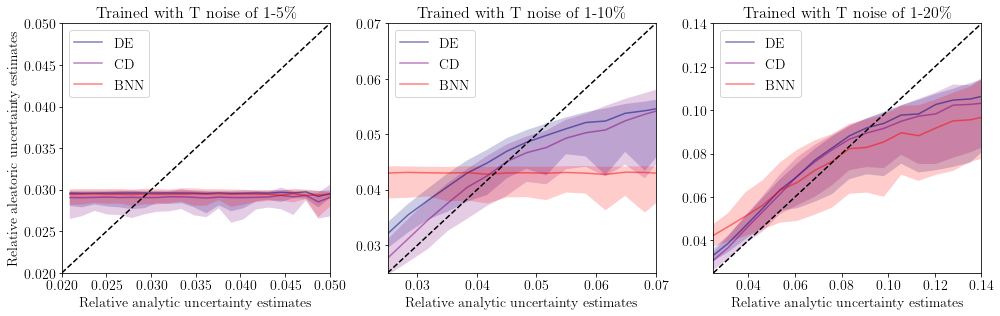

In [19]:
fontsize=14
fontsize_title=16

plt.figure(figsize=(14,4.5))

plt.subplot(131)
plt.plot(analytic_t1to5, median_de_t1to5, alpha=0.5, c='#000080', label='DE')
plt.fill_between(analytic_t1to5, low_de_t1to5, upp_de_t1to5,
                facecolor='#000080', alpha=0.2)
plt.plot(analytic_t1to5, median_cd_t1to5, alpha=0.5, c='#800080', label='CD')
plt.fill_between(analytic_t1to5, low_cd_t1to5, upp_cd_t1to5,
                facecolor='#800080', alpha=0.2)
plt.plot(analytic_t1to5, median_bnn_t1to5, alpha=0.5, c='#FF0000', label='BNN')
plt.fill_between(analytic_t1to5, low_bnn_t1to5, upp_bnn_t1to5,
                facecolor='#FF0000', alpha=0.2)
start_pt = 0.02
end_pt = 0.05
plt.plot([start_pt, end_pt], [start_pt, end_pt], '--', color=(0,0,0))
plt.xlim([start_pt, end_pt])
plt.ylim([start_pt, end_pt])
plt.legend(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Trained with T noise of 1-5\%', fontsize=fontsize_title)
plt.xlabel('Relative analytic uncertainty estimates', fontsize=fontsize)
plt.ylabel('Relative aleatoric uncertainty estimates', fontsize=fontsize)

ax0 = plt.subplot(132)
plt.plot(analytic_t1to10, median_de_t1to10, alpha=0.5, c='#000080', label='DE')
plt.fill_between(analytic_t1to10, low_de_t1to10, upp_de_t1to10,
                facecolor='#000080', alpha=0.2)
plt.plot(analytic_t1to10, median_cd_t1to10, alpha=0.5, c='#800080', label='CD')
plt.fill_between(analytic_t1to10, low_cd_t1to10, upp_cd_t1to10,
                facecolor='#800080', alpha=0.2)
plt.plot(analytic_t1to10, median_bnn_t1to10, alpha=0.5, c='#FF0000', label='BNN')
plt.fill_between(analytic_t1to10, low_bnn_t1to10, upp_bnn_t1to10,
                facecolor='#FF0000', alpha=0.2)
start_pt = 0.025
end_pt = 0.07
plt.plot([start_pt, end_pt], [start_pt, end_pt], '--', color=(0,0,0))
plt.xlim([start_pt, end_pt])
plt.ylim([start_pt, end_pt])
plt.legend(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Trained with T noise of 1-10\%', fontsize=fontsize_title)
plt.xlabel('Relative analytic uncertainty estimates', fontsize=fontsize)

ax0 = plt.subplot(133)
plt.plot(analytic_t1to20, median_de_t1to20, alpha=0.5, c='#000080', label='DE')
plt.fill_between(analytic_t1to20, low_de_t1to20, upp_de_t1to20,
                facecolor='#000080', alpha=0.2)
plt.plot(analytic_t1to20, median_cd_t1to20, alpha=0.5, c='#800080', label='CD')
plt.fill_between(analytic_t1to20, low_cd_t1to20, upp_cd_t1to20,
                facecolor='#800080', alpha=0.2)
plt.plot(analytic_t1to20, median_bnn_t1to20, alpha=0.5, c='#FF0000', label='BNN')
plt.fill_between(analytic_t1to20, low_bnn_t1to20, upp_bnn_t1to20,
                facecolor='#FF0000', alpha=0.2)
start_pt = 0.025
end_pt = 0.14
plt.plot([start_pt, end_pt], [start_pt, end_pt], '--', color=(0,0,0))
plt.xlim([start_pt, end_pt])
plt.ylim([start_pt, end_pt])
plt.legend(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Trained with T noise of 1-20\%', fontsize=fontsize_title)
plt.xlabel('Relative analytic uncertainty estimates', fontsize=fontsize)
plt.tight_layout()
plt.savefig('comparisons_diffnoise_perc.pdf', fmt='pdf', dpi=500)
plt.savefig('comparisons_diffnoise_perc.png', fmt='png', dpi=500)

In [20]:
y_pred_bnn_oodl = []
y_pred_alunc_bnn_oodl = []
y_pred_epunc_bnn_oodl = []
y_pred_prunc_bnn_oodl = []
for i in range(2, 16):
    y_pred_bnn_oodl.append(np.load(f'data/y_pred_test_bnn_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    y_pred_alunc_bnn_oodl.append(np.load(f'data/y_pred_test_alunc_bnn_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    y_pred_epunc_bnn_oodl.append(np.load(f'data/y_pred_test_epunc_bnn_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    y_pred_prunc_bnn_oodl.append(np.load(f'data/y_pred_test_prunc_bnn_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    
y_pred_de_oodl = []
y_pred_alunc_de_oodl = []
y_pred_epunc_de_oodl = []
y_pred_prunc_de_oodl = []
for i in range(2, 16):
    y_pred_de_oodl.append(np.load(f'data/y_pred_test_de_trange1to20_40ep_001_ell{i}to{i+1}.npy'))
    y_pred_alunc_de_oodl.append(np.load(f'data/y_pred_test_alunc_de_trange1to20_40ep_001_ell{i}to{i+1}.npy'))
    y_pred_epunc_de_oodl.append(np.load(f'data/y_pred_test_epunc_de_trange1to20_40ep_001_ell{i}to{i+1}.npy'))
    y_pred_prunc_de_oodl.append(np.load(f'data/y_pred_test_prunc_de_trange1to20_40ep_001_ell{i}to{i+1}.npy'))
    
y_pred_cd_oodl = []
y_pred_alunc_cd_oodl = []
y_pred_epunc_cd_oodl = []
y_pred_prunc_cd_oodl = []
for i in range(2, 16):
    y_pred_cd_oodl.append(np.load(f'data/y_pred_test_cd_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    y_pred_alunc_cd_oodl.append(np.load(f'data/y_pred_test_alunc_cd_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    y_pred_epunc_cd_oodl.append(np.load(f'data/y_pred_test_epunc_cd_trange1to20_200ep_001_ell{i}to{i+1}.npy'))
    y_pred_prunc_cd_oodl.append(np.load(f'data/y_pred_test_prunc_cd_trange1to20_200ep_001_ell{i}to{i+1}.npy'))

In [21]:
y_pred_epunc_bnn_oodl_50 = np.percentile(y_pred_epunc_bnn_oodl, 50, axis=1)
y_pred_epunc_cd_oodl_50 = np.percentile(y_pred_epunc_cd_oodl, 50, axis=1)
y_pred_epunc_de_oodl_50 = np.percentile(y_pred_epunc_de_oodl, 50, axis=1)
y_pred_epunc_bnn_oodl_16 = np.percentile(y_pred_epunc_bnn_oodl, 16, axis=1)
y_pred_epunc_cd_oodl_16 = np.percentile(y_pred_epunc_cd_oodl, 16, axis=1)
y_pred_epunc_de_oodl_16 = np.percentile(y_pred_epunc_de_oodl, 16, axis=1)
y_pred_epunc_bnn_oodl_84 = np.percentile(y_pred_epunc_bnn_oodl, 84, axis=1)
y_pred_epunc_cd_oodl_84 = np.percentile(y_pred_epunc_cd_oodl, 84, axis=1)
y_pred_epunc_de_oodl_84 = np.percentile(y_pred_epunc_de_oodl, 84, axis=1)

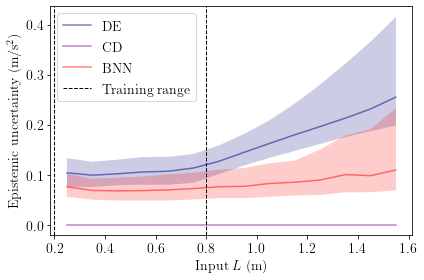

In [22]:
fontsize=14
fontsize_title=16

x = np.arange(0.25, 1.6, 0.1)
plt.plot(x, y_pred_epunc_de_oodl_50, alpha=0.5, c='#000080', label='DE')
plt.fill_between(x, y_pred_epunc_de_oodl_16, y_pred_epunc_de_oodl_84,
                facecolor='#000080', alpha=0.2)
plt.plot(x, y_pred_epunc_cd_oodl_50, alpha=0.5, c='#800080', label='CD')
plt.fill_between(x, y_pred_epunc_cd_oodl_16, y_pred_epunc_cd_oodl_84,
                facecolor='#800080', alpha=0.2)
plt.plot(x, y_pred_epunc_bnn_oodl_50, alpha=0.5, c='#FF0000', label='BNN')
plt.fill_between(x, y_pred_epunc_bnn_oodl_16, y_pred_epunc_bnn_oodl_84,
                facecolor='#FF0000', alpha=0.2)
plt.axvline(0.2, ls='--', c='black', linewidth=1)
plt.axvline(0.8, ls='--', c='black', linewidth=1, label='Training range')

plt.legend(fontsize=fontsize, loc=2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Input $L$ (m)', fontsize=fontsize)
plt.ylabel('Epistemic uncertainty (m/s$^2$)', fontsize=fontsize)
plt.tight_layout()
plt.savefig('oodl.pdf', fmt='pdf', dpi=500)
plt.savefig('oodl.png', fmt='png', dpi=500)

In [23]:
residuals_de = y_pred_de_t1to20 - y_test_t1to20
residuals_cd = y_pred_cd_t1to20 - y_test_t1to20
residuals_bnn = y_pred_bnn_t1to20 - y_test_t1to20

In [24]:
coverage_de = find_coverage(residuals_de, y_pred_prunc_de_t1to20)
coverage_cd = find_coverage(residuals_cd, y_pred_prunc_cd_t1to20)
coverage_bnn = find_coverage(residuals_bnn, y_pred_prunc_bnn_t1to20)

In [25]:
y_pred_de_t1to20_8to12 = np.load('data/y_pred_test_de_trange1to20_40ep_001_ell8to12.npy')
y_pred_prunc_de_t1to20_8to12 = np.load('data/y_pred_test_prunc_de_trange1to20_40ep_001_ell8to12.npy')

y_pred_cd_t1to20_8to12 = np.load('data/y_pred_test_cd_trange1to20_200ep_001_ell8to12.npy')
y_pred_prunc_cd_t1to20_8to12 = np.load('data/y_pred_test_prunc_cd_trange1to20_200ep_001_ell8to12.npy')

y_pred_bnn_t1to20_8to12 = np.load('data/y_pred_test_bnn_trange1to20_200ep_001_ell8to12.npy')
y_pred_prunc_bnn_t1to20_8to12 = np.load('data//y_pred_test_prunc_bnn_trange1to20_200ep_001_ell8to12.npy')

In [26]:
y_pred_de_t1to20_12to16 = np.load('data/y_pred_test_de_trange1to20_40ep_001_ell12to16.npy')
y_pred_prunc_de_t1to20_12to16 = np.load('data/y_pred_test_prunc_de_trange1to20_40ep_001_ell12to16.npy')

y_pred_cd_t1to20_12to16 = np.load('data/y_pred_test_cd_trange1to20_200ep_001_ell12to16.npy')
y_pred_prunc_cd_t1to20_12to16 = np.load('data/y_pred_test_prunc_cd_trange1to20_200ep_001_ell12to16.npy')

y_pred_bnn_t1to20_12to16 = np.load('data/y_pred_test_bnn_trange1to20_200ep_001_ell12to16.npy')
y_pred_prunc_bnn_t1to20_12to16 = np.load('data//y_pred_test_prunc_bnn_trange1to20_200ep_001_ell12to16.npy')

In [27]:
feat_test_t1to20_8to12, y_test_t1to20_8to12, calc_y_test_t1to20_8to12, delta_y_test_t1to20_8to12 = pendulum(n=nobject, t_spread=[0.01, 0.2],
                                                  ell_spread=[0.02, 0.02], seed=666, ell_range=[0.8, 1.2])

In [28]:
feat_test_t1to20_12to16, y_test_t1to20_12to16, calc_y_test_t1to20_12to16, delta_y_test_t1to20_12to16 = pendulum(n=nobject, t_spread=[0.01, 0.2],
                                                  ell_spread=[0.02, 0.02], seed=666, ell_range=[1.2, 1.6])

In [29]:
residuals_de_8to12 = y_pred_de_t1to20_8to12 - y_test_t1to20_8to12
residuals_cd_8to12 = y_pred_cd_t1to20_8to12 - y_test_t1to20_8to12
residuals_bnn_8to12 = y_pred_bnn_t1to20_8to12 - y_test_t1to20_8to12

residuals_de_12to16 = y_pred_de_t1to20_12to16 - y_test_t1to20_12to16
residuals_cd_12to16 = y_pred_cd_t1to20_12to16 - y_test_t1to20_12to16
residuals_bnn_12to16 = y_pred_bnn_t1to20_12to16 - y_test_t1to20_12to16

In [30]:
coverage_de_8to12 = find_coverage(residuals_de_8to12, y_pred_prunc_de_t1to20_8to12)
coverage_cd_8to12 = find_coverage(residuals_cd_8to12, y_pred_prunc_cd_t1to20_8to12)
coverage_bnn_8to12 = find_coverage(residuals_bnn_8to12, y_pred_prunc_bnn_t1to20_8to12)

coverage_de_12to16 = find_coverage(residuals_de_12to16, y_pred_prunc_de_t1to20_12to16)
coverage_cd_12to16 = find_coverage(residuals_cd_12to16, y_pred_prunc_cd_t1to20_12to16)
coverage_bnn_12to16 = find_coverage(residuals_bnn_12to16, y_pred_prunc_bnn_t1to20_12to16)

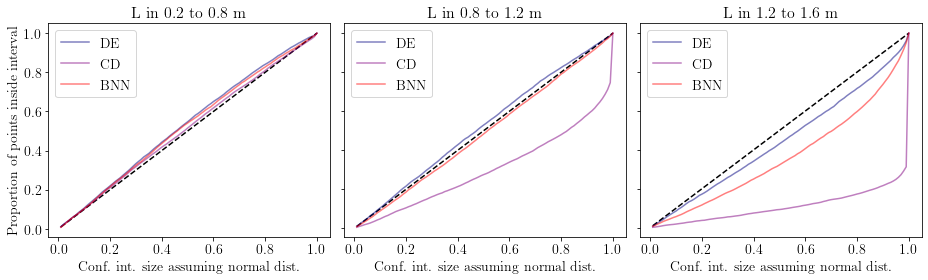

In [31]:
x = np.linspace(0.01, 1, 100)

fontsize=14
fontsize_title=16

plt.figure(figsize=(13,4))

ax0 = plt.subplot(131)
plt.plot(x, x, ls='--', c=(0,0,0))
plt.plot(x, coverage_de, label='DE', c='#000080', alpha=0.5)
plt.plot(x, coverage_cd, label='CD', c='#800080', alpha=0.5)
plt.plot(x, coverage_bnn, label='BNN', c='#FF0000', alpha=0.5)
plt.legend(fontsize=fontsize)
plt.xlabel('Conf. int. size assuming normal dist.', fontsize=fontsize)
plt.ylabel('Proportion of points inside interval', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('L in 0.2 to 0.8 m', fontsize=fontsize_title)

ax0 = plt.subplot(132)
plt.plot(x, x, ls='--', c=(0,0,0))
plt.plot(x, coverage_de_8to12, label='DE', c='#000080', alpha=0.5)
plt.plot(x, coverage_cd_8to12, label='CD', c='#800080', alpha=0.5)
plt.plot(x, coverage_bnn_8to12, label='BNN', c='#FF0000', alpha=0.5)
plt.legend(fontsize=fontsize)
plt.xlabel('Conf. int. size assuming normal dist.', fontsize=fontsize)
plt.setp(ax0.get_yticklabels(), visible=False)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('L in 0.8 to 1.2 m', fontsize=fontsize_title)
plt.subplots_adjust(wspace=0., hspace=0.)

ax0 = plt.subplot(133)
plt.plot(x, x, ls='--', c=(0,0,0))
plt.plot(x, coverage_de_12to16, label='DE', c='#000080', alpha=0.5)
plt.plot(x, coverage_cd_12to16, label='CD', c='#800080', alpha=0.5)
plt.plot(x, coverage_bnn_12to16, label='BNN', c='#FF0000', alpha=0.5)
plt.legend(fontsize=fontsize)
plt.xlabel('Conf. int. size assuming normal dist.', fontsize=fontsize)
plt.setp(ax0.get_yticklabels(), visible=False)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('L in 1.2 to 1.6 m', fontsize=fontsize_title)
plt.tight_layout()
plt.savefig('calibration_changingell.pdf', fmt='pdf', dpi=500)
plt.savefig('calibration_changingell.png', fmt='png', dpi=500)

In [32]:
y_pred_bnn_oodg = []
y_pred_alunc_bnn_oodg = []
y_pred_epunc_bnn_oodg = []
y_pred_prunc_bnn_oodg = []
for i in range(10, 25):
    y_pred_bnn_oodg.append(np.load(f'data/y_pred_test_bnn_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    y_pred_alunc_bnn_oodg.append(np.load(f'data/y_pred_test_alunc_bnn_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    y_pred_epunc_bnn_oodg.append(np.load(f'data/y_pred_test_epunc_bnn_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    y_pred_prunc_bnn_oodg.append(np.load(f'data/y_pred_test_prunc_bnn_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    
y_pred_de_oodg = []
y_pred_alunc_de_oodg = []
y_pred_epunc_de_oodg = []
y_pred_prunc_de_oodg = []
for i in range(10, 25):
    y_pred_de_oodg.append(np.load(f'data/y_pred_test_de_trange1to20_40ep_001_g{i}to{i+1}.npy'))
    y_pred_alunc_de_oodg.append(np.load(f'data/y_pred_test_alunc_de_trange1to20_40ep_001_g{i}to{i+1}.npy'))
    y_pred_epunc_de_oodg.append(np.load(f'data/y_pred_test_epunc_de_trange1to20_40ep_001_g{i}to{i+1}.npy'))
    y_pred_prunc_de_oodg.append(np.load(f'data/y_pred_test_prunc_de_trange1to20_40ep_001_g{i}to{i+1}.npy'))
    
y_pred_cd_oodg = []
y_pred_alunc_cd_oodg = []
y_pred_epunc_cd_oodg = []
y_pred_prunc_cd_oodg = []
for i in range(10, 25):
    y_pred_cd_oodg.append(np.load(f'data/y_pred_test_cd_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    y_pred_alunc_cd_oodg.append(np.load(f'data/y_pred_test_alunc_cd_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    y_pred_epunc_cd_oodg.append(np.load(f'data/y_pred_test_epunc_cd_trange1to20_200ep_001_g{i}to{i+1}.npy'))
    y_pred_prunc_cd_oodg.append(np.load(f'data/y_pred_test_prunc_cd_trange1to20_200ep_001_g{i}to{i+1}.npy'))

In [32]:
y_pred_epunc_bnn_oodg_50 = np.percentile(y_pred_epunc_bnn_oodg, 50, axis=1)
y_pred_epunc_cd_oodg_50 = np.percentile(y_pred_epunc_cd_oodg, 50, axis=1)
y_pred_epunc_de_oodg_50 = np.percentile(y_pred_epunc_de_oodg, 50, axis=1)
y_pred_epunc_bnn_oodg_16 = np.percentile(y_pred_epunc_bnn_oodg, 16, axis=1)
y_pred_epunc_cd_oodg_16 = np.percentile(y_pred_epunc_cd_oodg, 16, axis=1)
y_pred_epunc_de_oodg_16 = np.percentile(y_pred_epunc_de_oodg, 16, axis=1)
y_pred_epunc_bnn_oodg_84 = np.percentile(y_pred_epunc_bnn_oodg, 84, axis=1)
y_pred_epunc_cd_oodg_84 = np.percentile(y_pred_epunc_cd_oodg, 84, axis=1)
y_pred_epunc_de_oodg_84 = np.percentile(y_pred_epunc_de_oodg, 84, axis=1)

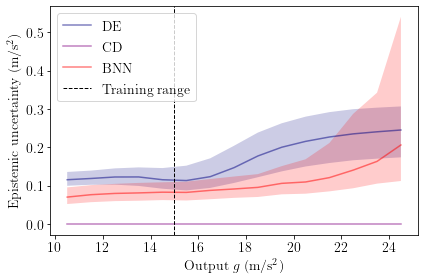

In [33]:
fontsize=14
fontsize_title=16

x = np.arange(10.5, 25, 1.)
plt.plot(x, y_pred_epunc_de_oodg_50, alpha=0.5, c='#000080', label='DE')
plt.fill_between(x, y_pred_epunc_de_oodg_16, y_pred_epunc_de_oodg_84,
                facecolor='#000080', alpha=0.2)
plt.plot(x, y_pred_epunc_cd_oodg_50, alpha=0.5, c='#800080', label='CD')
plt.fill_between(x, y_pred_epunc_cd_oodg_16, y_pred_epunc_cd_oodg_84,
                facecolor='#800080', alpha=0.2)
plt.plot(x, y_pred_epunc_bnn_oodg_50, alpha=0.5, c='#FF0000', label='BNN')
plt.fill_between(x, y_pred_epunc_bnn_oodg_16, y_pred_epunc_bnn_oodg_84,
                facecolor='#FF0000', alpha=0.2)
plt.axvline(15, ls='--', c='black', linewidth=1, label='Training range')

plt.legend(fontsize=fontsize, loc=2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Output $g$ (m/s$^2$)', fontsize=fontsize)
plt.ylabel('Epistemic uncertainty (m/s$^2$)', fontsize=fontsize)
plt.tight_layout()
plt.savefig('oodg.pdf', fmt='pdf', dpi=500)
plt.savefig('oodg.png', fmt='png', dpi=500)

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
from models.cd import make_model
model = make_model(13, 1, 100)
model.load_weights('data/model_cd_trange1to20_200ep_001.h5')

In [21]:
print('Dropout probabilities: ', np.array([sigmoid(layer.p_logit.numpy()) for layer in model.layers if hasattr(layer, 'p_logit')]).flatten())

Dropout probabilities:  [5.7058816e-05 1.2645748e-06 2.5880211e-06 1.3074545e-06 1.9308177e-06]


In [35]:
corr_cd_1to5 = np.corrcoef(delta_y_test_t1to5/calc_y_test_t1to5, y_pred_alunc_cd_t1to5/y_pred_cd_t1to5)[0, 1]
corr_cd_1to10 = np.corrcoef(delta_y_test_t1to10/calc_y_test_t1to10, y_pred_alunc_cd_t1to10/y_pred_cd_t1to10)[0, 1]
corr_cd_1to20 = np.corrcoef(delta_y_test_t1to20/calc_y_test_t1to20, y_pred_alunc_cd_t1to20/y_pred_cd_t1to20)[0, 1]
corr_de_1to5 = np.corrcoef(delta_y_test_t1to5/calc_y_test_t1to5, y_pred_alunc_de_t1to5/y_pred_de_t1to5)[0, 1]
corr_de_1to10 = np.corrcoef(delta_y_test_t1to10/calc_y_test_t1to10, y_pred_alunc_de_t1to10/y_pred_de_t1to10)[0, 1]
corr_de_1to20 = np.corrcoef(delta_y_test_t1to20/calc_y_test_t1to20, y_pred_alunc_de_t1to20/y_pred_de_t1to20)[0, 1]
corr_bnn_1to5 = np.corrcoef(delta_y_test_t1to5/calc_y_test_t1to5, y_pred_alunc_bnn_t1to5/y_pred_bnn_t1to5)[0, 1]
corr_bnn_1to10 = np.corrcoef(delta_y_test_t1to10/calc_y_test_t1to10, y_pred_alunc_bnn_t1to10/y_pred_bnn_t1to10)[0, 1]
corr_bnn_1to20 = np.corrcoef(delta_y_test_t1to20/calc_y_test_t1to20, y_pred_alunc_bnn_t1to20/y_pred_bnn_t1to20)[0, 1]

In [36]:
x = np.linspace(0.01, 1, 100)
coverage_err_cd_2to8 = np.sum(np.abs([coverage_cd-x]))/100
coverage_err_de_2to8 = np.sum(np.abs([coverage_de-x]))/100
coverage_err_bnn_2to8 = np.sum(np.abs([coverage_bnn-x]))/100
coverage_err_cd_8to12 = np.sum(np.abs([coverage_cd_8to12-x]))/100
coverage_err_de_8to12 = np.sum(np.abs([coverage_de_8to12-x]))/100
coverage_err_bnn_8to12 = np.sum(np.abs([coverage_bnn_8to12-x]))/100
coverage_err_cd_12to16 = np.sum(np.abs([coverage_cd_12to16-x]))/100
coverage_err_de_12to16 = np.sum(np.abs([coverage_de_12to16-x]))/100
coverage_err_bnn_12to16 = np.sum(np.abs([coverage_bnn_12to16-x]))/100

In [37]:
mse_cd = mean_squared_error(y_test_t1to20, y_pred_cd_t1to20)
mse_de = mean_squared_error(y_test_t1to20, y_pred_de_t1to20)
mse_bnn = mean_squared_error(y_test_t1to20, y_pred_bnn_t1to20)

In [38]:
print(' & '.join(['', '1-5\%', '1-10\%', '1-20\%', '', '(0.2, 0.8) m', '(0.8, 1.2) m', '(1.2, 1.6) m', '\\\\']))
print(' & '.join(['DE', '%.2f' % corr_de_1to5, '%.2f' % corr_de_1to10, '%.2f' % corr_de_1to20, '', '%.3f' % coverage_err_de_2to8, 
                  '%.3f' % coverage_err_de_8to12, '%.3f' % coverage_err_de_12to16, '%.2f \\\\' % mse_de]))
print(' & '.join(['CD', '%.2f' % corr_cd_1to5, '%.2f' % corr_cd_1to10, '%.2f' % corr_cd_1to20, '', '%.3f' % coverage_err_cd_2to8, 
                  '%.2f' % coverage_err_cd_8to12, '%.2f' % coverage_err_cd_12to16, '%.2f \\\\' % mse_cd]))
print(' & '.join(['BNN', '%.2f' % corr_bnn_1to5, '%.2f' % corr_bnn_1to10, '%.2f' % corr_bnn_1to20, '', '%.3f' % coverage_err_bnn_2to8, 
                  '%.3f' % coverage_err_bnn_8to12, '%.3f' % coverage_err_bnn_12to16, '%.2f \\\\' % mse_bnn]))

 & 1-5\% & 1-10\% & 1-20\% &  & (0.2, 0.8) m & (0.8, 1.2) m & (1.2, 1.6) m & \\
DE & 0.00 & 0.79 & 0.84 &  & 0.031 & 0.019 & 0.055 & 0.49 \\
CD & 0.00 & 0.83 & 0.84 &  & 0.011 & 0.20 & 0.39 & 0.51 \\
BNN & 0.00 & -0.00 & 0.76 &  & 0.023 & 0.014 & 0.137 & 0.51 \\
